# Food Ingredient Lists

In [33]:
# Загрузка библиотек
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

## Обработка сырых данных

In [13]:
# Загрузка данных
df = pd.read_csv('../data/ingredients v1.csv')

# Выбор колонок
df = df[['categories', 'features.value', 'name']]

In [74]:
# Разбивка ингредиентов
categories = []
features = []
name = []
for i in df.index:
    value = re.sub('^\[\'|\'\]$', '', str(df['features.value'][df.index==i].tolist())).split(',')
    features += value
    name += df['name'][df.index==i].tolist()*len(value)
    categories += df['categories'][df.index==i].tolist()*len(value)

In [75]:
# Сохранение в датасет
df_lists = pd.DataFrame({
    'categories': categories,
    'features': features,
    'name': name
})

In [97]:
df_lists.head()

,categories,features,name
0,"Grocery & Gourmet Food,Food,Grocery",Dried Prunes,Simon Fischer Fruit Bttr Prune Lekvar
1,"Grocery & Gourmet Food,Food,Grocery",Water,Simon Fischer Fruit Bttr Prune Lekvar
2,"Grocery & Gourmet Food,Food,Grocery",Corn Syrup,Simon Fischer Fruit Bttr Prune Lekvar
3,"Grocery & Gourmet Food,Food,Grocery",Sugar,Simon Fischer Fruit Bttr Prune Lekvar
4,"Grocery & Gourmet Food,Food,Grocery",Pectin.,Simon Fischer Fruit Bttr Prune Lekvar


In [89]:
# Очистка данных
for i in df_lists.index:
    value = re.sub('^\[\'|\'\]$', '', str(df_lists.features[df_lists.index==i].tolist()))
    value = re.sub('^ ', '', value)
    df_lists.features[df_lists.index==i] = value
df_lists = df_lists[df_lists.features != '.']
df_lists.features[df_lists.features == 'salt'] = 'Salt'
df_lists.features[df_lists.features == 'Folic Acid)'] = 'Folic Acid'
df_lists.features[df_lists.features == 'Natural Flavors'] = 'Natural Flavor'

In [96]:
# Сохранение данных
df_lists.to_csv('../data/df_lists.csv', index=False)

## Анализ данных

In [154]:
# Загрузка данных
df = pd.read_csv('../data/df_lists.csv')
df.head()

,categories,features,name
0,"Grocery & Gourmet Food,Food,Grocery",Dried Prunes,Simon Fischer Fruit Bttr Prune Lekvar
1,"Grocery & Gourmet Food,Food,Grocery",Water,Simon Fischer Fruit Bttr Prune Lekvar
2,"Grocery & Gourmet Food,Food,Grocery",Corn Syrup,Simon Fischer Fruit Bttr Prune Lekvar
3,"Grocery & Gourmet Food,Food,Grocery",Sugar,Simon Fischer Fruit Bttr Prune Lekvar
4,"Grocery & Gourmet Food,Food,Grocery",Pectin.,Simon Fischer Fruit Bttr Prune Lekvar


In [155]:
# Частота ингредиентов
df_top = df.features.value_counts().reset_index()
df_top = df_top[df_top['index'] != ')']

In [156]:
df_top.head(30)

,index,features
0,Salt,4467
1,Sugar,3454
2,Water,2082
3,Citric Acid,1537
4,Natural Flavor,1459
5,Niacin,1269
6,Folic Acid,1125
7,Soy Lecithin,1039
8,Corn Syrup,1034
9,Reduced Iron,852


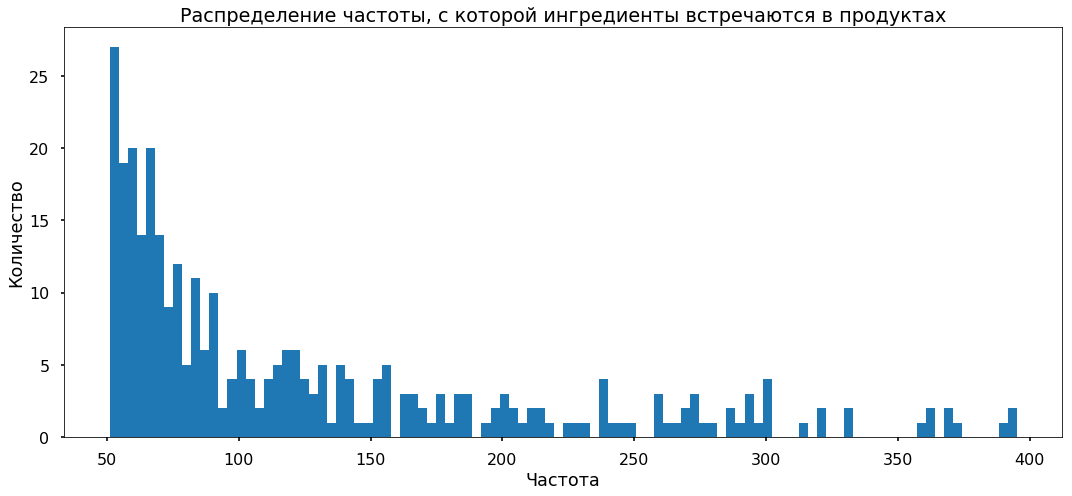

In [158]:
# Распределение частоты, с которой ингредиенты встречаются в продуктах
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.hist(df_top.features[(df_top.features<400) & (df_top.features>50)], bins=100)
plt.title('Importances of Features Plot')
plt.title('Распределение частоты, с которой ингредиенты встречаются в продуктах')
plt.ylabel('Количество')
plt.xlabel('Частота')
plt.tight_layout()
plt.show()

In [159]:
# Выбор ингредиентов с частотой больше 50, но меньше 400
df_top = df_top['index'][(df_top.features<400) & (df_top.features>50)]
df = df[df.features.isin(df_top)]
df = df[['features', 'name']]

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40114 entries, 8 to 141068
Data columns (total 2 columns):
features    40114 non-null object
name        40114 non-null object
dtypes: object(2)
memory usage: 940.2+ KB


In [161]:
# Переформатирование таблицы
df['n'] = 1
df = pd.pivot_table(df, index='features', columns='name', values='n', aggfunc=np.sum, fill_value=0)

In [167]:
df.head()

name,"! Candy Pop, Green Apple, 0.53 oz (15 g)","#1 Best-Selling 5oz. Flavor God Seasonings (4 Seasoning Combo Set, 4 Bottles)","'Tyson Grilled & Ready Southwestern Style Chicken Breast Strips, 6 oz",***discontinued***cm Icing - Blue,*Pillsbury Whipped Supreme Milk Chocolate Frosting 12 oz,1 Oz Tic Tac Cherry Mints,1 X Cassoulet With Duck Confit From France - Cassoulet Gastronomique Au Confit De Canard La Belle Chaurienne - 3060 Gr - 7 Serves + 1 Bag of Provencal Herbs Thï¿½ï¿½odore Bardin-cuinet,1 X Wild Boar Stew and Vegetable Garnish From France - Civet De Sanglier Et Sa Garniture De Lï¿½ï¿½gumes La Belle Chaurienne - 750 Gr - 2 Serves + 1 Bag of Basil Thï¿½ï¿½odore Bardin-cuinet,"1-2-3 Vegetable Oil, 1 gal",1.5 oz Jalapeno Smokehouse Almond Nuts,...,alo Exposed Original Drink - 16.9 oz,barkTHINS Dark Chocolate,bionaturae Organic Penne Rigate,"flipz Pretzels, Milk Chocolate Covered, 5 oz (141 g)","gimMe Snacks Organic Roasted Seaweed Snacks, Sea Salt, 0.17 Ounce (Pack of 12)","ginnybakes Chocolate Chip Love Cookies, 5.5 oz, ()","ginnybakes organics, Organic Gluten Free Cookies, Double Chocolate Happiness, 5.5 Ounce",illy issimo Latte Macchiato 8.45 oz Cans -,"j.skinner Sensational Strawberry Cheese Danish, 14.0 OZ","thinkThin High Protein _ Fiber Bar Chocolate Peanut Butter Toffee, 1.76 OZ"
features,,,,,,,,,,,,,,,,,,,,,
Acesulfame K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acesulfame Potassium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Almonds,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Ammonium Bicarbonate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apples,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Кластерный анализ

In [163]:
# Вычисление расстояния
model = linkage(df, 'ward')

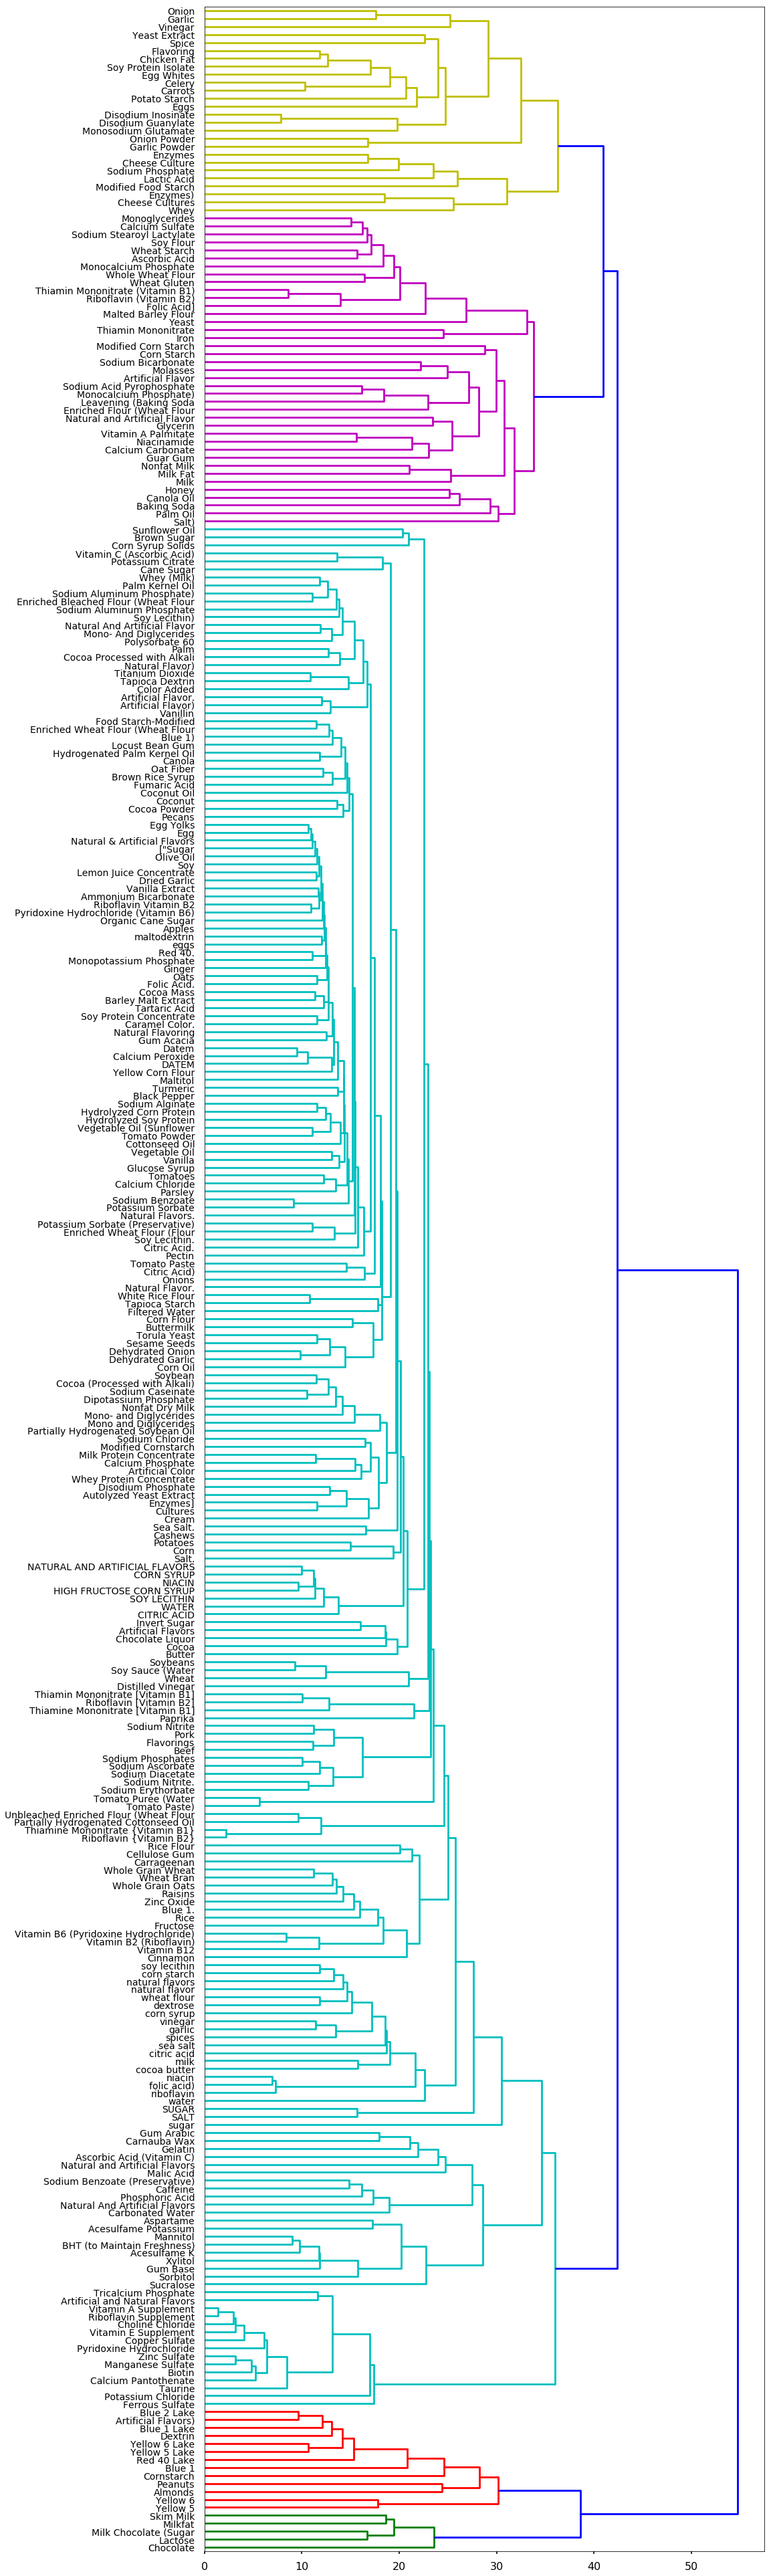

In [164]:
# Дендрограмма
fig = plt.figure(figsize=(15, 70))
dendrogram(model, orientation='right', labels=df.index, leaf_font_size=14) 
plt.show()